In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = 'c:\Windows\Fonts\malgun.ttf' # 폰트 파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
rc('axes', unicode_minus=False) # 마이너스 표기
# 레티나 폰트로 선명하게
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

# 데이터셋 로드

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

print(iris.feature_names)
print(iris.target_names)

# 데이터 프레임으로 한눈에 보기
irisDF = pd.DataFrame(iris.data, columns=iris.feature_names)
irisDF['target'] = iris.target_names[iris.target]

print(irisDF.target.value_counts())
print(irisDF.shape)

irisDF.head()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64
(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 선형 SVM

## 서포트 벡터 머신의 이해

In [3]:
# SVM이해를 돕기 위해 setosa 품종과 versicolor 품종의 꽃잎만 사용합니다.
irisDF[(irisDF.target == 'setosa') | (irisDF.target == 'versicolor')].describe().iloc[:, 2:]

,petal length (cm),petal width (cm)
count,100.000000,100.000000
mean,2.861000,0.786000
std,1.449549,0.565153
min,1.000000,0.100000
25%,1.500000,0.200000
50%,2.450000,0.800000
75%,4.325000,1.300000
max,5.100000,1.800000


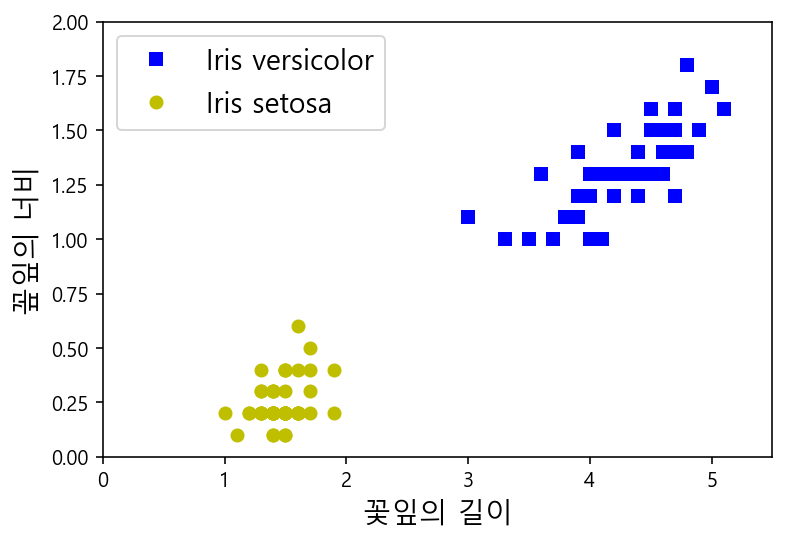

In [4]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")  # versicolor 품종을 파란사각형으로 표시합니다.
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")  # setosa 품종을 노란 원으로 표시합니다.
plt.legend(loc="upper left", fontsize=14)  # 범례를 왼쪽 위에 표시합니다.
plt.axis([0, 5.5, 0, 2])  # 축의 범위를 지정합니다.
plt.xlabel("꽃잎의 길이", fontsize=14)
plt.ylabel("꽆잎의 너비", fontsize=14)
plt.show()

In [5]:
from sklearn.svm import SVC

# SVM 분류 모델
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)
print('법선벡터 :', tuple(svm_clf.coef_[0]))
print('상수 :', svm_clf.intercept_[0])

법선벡터 : (1.2941174364598989, 0.8235292777472085)
상수 : -3.7882347112962464


In [6]:
def plot_svc_decision_boundary(svm_clf,
                               xmin,
                               xmax,
                               margin=True):  # SVC 결정경계를 표현하는 함수를 정의합니다.
    w = svm_clf.coef_[0]  # 법선벡터
    b = svm_clf.intercept_[0]  # 상수
    v = w[0]**2 + w[1]**2  # 벡터의 크기

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)  # 선을 긋기 위해 200개의 점을 생성합니다.
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]  # 결정경계

    gutter_up = decision_boundary + 1 / w[1]
    gutter_down = decision_boundary - 1 / w[1]

    s1, s2 = svm_clf.support_vectors_[:, 0], svm_clf.support_vectors_[:, 1]
    plt.scatter(s1, s2, s=180, facecolors='#FFAAAA',
                label='서포트 벡터')  # 서포트 벡터를 분홍색으로 표시합니다.

    if margin:
        n0 = np.linspace(
            -w[0] * b / v - w[0] / v, -w[0] * b / v + w[0] / v, 200
        )  # 법선벡터 선을 긋기 위해 200개의 점을 생성합니다.
        nv = w[1] / w[0] * n0
        plt.plot(n0, nv, "r-", linewidth=5, label='마진')  # 마진을 녹색 선으로 표현합니다.

    plt.plot(x0, decision_boundary, "k-", linewidth=2, label='결정경계')
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

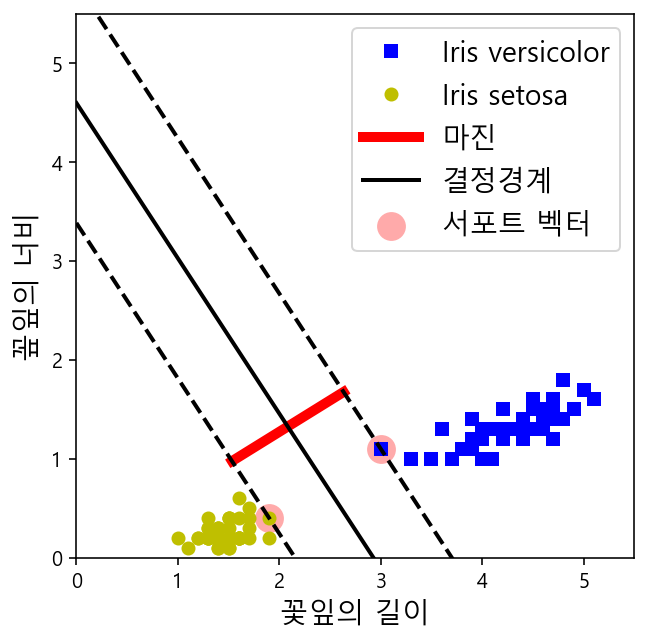

In [7]:
plt.figure(figsize=(5,5))
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")  # versicolor 품종을 파란사각형으로 표시합니다.
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")  # setosa 품종을 노란 원으로 표시합니다.
plt.axis([0, 5.5, 0, 5.5])  # 축의 범위를 지정합니다.
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.legend(loc="upper right", fontsize=14)  # 범례를 왼쪽 위에 표시합니다.
plt.xlabel("꽃잎의 길이", fontsize=14)
plt.ylabel("꽆잎의 너비", fontsize=14)
plt.show()

### 번외

+ 법선벡터

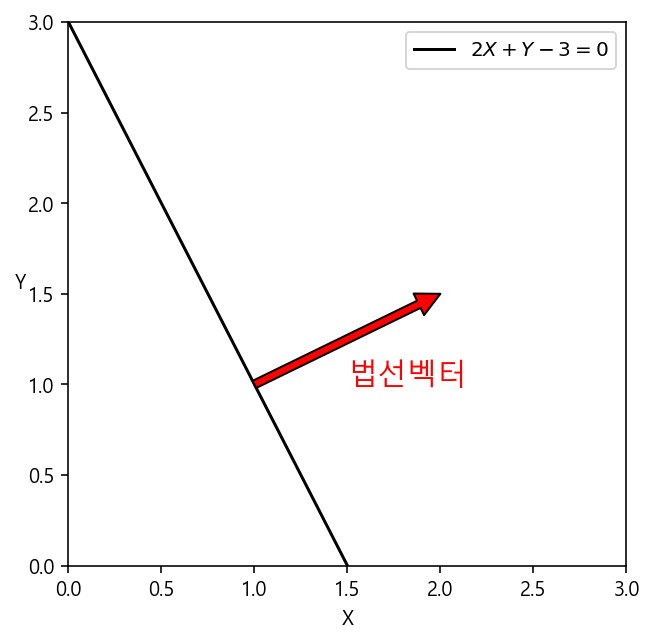

In [8]:
plt.figure(figsize=(5,5))
x = np.linspace(-1, 3, 200)
y = -2*x+3
plt.plot(x, y, 'k-', label='$2X+Y-3=0$')
plt.axis([0, 3, 0, 3])
plt.xlabel('X')
plt.ylabel('Y', rotation=0)
plt.legend()
plt.annotate(
    "",
    xy=(2, 1.5),
    xytext=(1, 1),
    arrowprops=dict(facecolor='r', shrink=0),
)
plt.text(1.5, 1, '법선벡터', color='r', fontsize=15)
plt.show()

+ 내적   
   
$
\begin{split}
&for\ \ \ \vec{a} = (a_1, a_2, a_3),\ \ \ \vec{b}=(b_1, b_2, b_3) \\
&\vec{a}\cdot\vec{b}=\begin{Vmatrix}a\end{Vmatrix}\cdot\begin{Vmatrix}b\end{Vmatrix}\cos{\theta} \\
&\vec{a}\cdot\vec{b}=a_1\cdot b_1+a_2\cdot b_2+a_3\cdot b_3
\end{split}
$

+ 결정함수   
   
$
\hat{y} = \begin{cases}
 0 & \mathbf{w}^T \mathbf{x} + b < 0 \text{ 일 때}, \\
 1 & \mathbf{w}^T \mathbf{x} + b \geq 0 \text{ 일 때}
\end{cases}
$

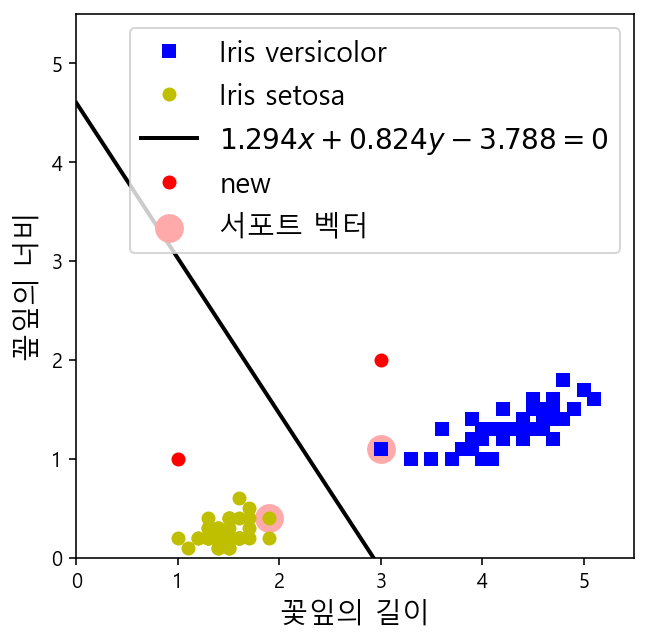

In [9]:
plt.figure(figsize=(5,5))
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")  # versicolor 품종을 파란사각형으로 표시합니다.
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")  # setosa 품종을 노란 원으로 표시합니다.

w = svm_clf.coef_[0]  # 법선벡터
b = svm_clf.intercept_[0]  # 상수

x0 = np.linspace(0, 5.5, 200)  # 선을 긋기 위해 200개의 점을 생성합니다.
decision_boundary = -w[0] / w[1] * x0 - b / w[1]  # 결정경계

s1, s2 = svm_clf.support_vectors_[:, 0], svm_clf.support_vectors_[:, 1]
plt.scatter(s1, s2, s=180, facecolors='#FFAAAA',
            label='서포트 벡터')  # 서포트 벡터를 분홍색으로 표시합니다.

plt.plot(x0, decision_boundary, "k-", linewidth=2, label='$1.294x+0.824y-3.788=0$')
# plot_svc_decision_boundary(svm_clf, 0, 5.5, False)
plt.xlabel("꽃잎의 길이", fontsize=14)
plt.ylabel("꽆잎의 너비", fontsize=14)
plt.plot([1,3], [1,2], 'ro', label='new')
plt.axis([0, 5.5, 0, 5.5])  # 축의 범위를 지정합니다.
plt.legend(loc="upper right", fontsize=14)  # 범례를 왼쪽 위에 표시합니다.
plt.show()

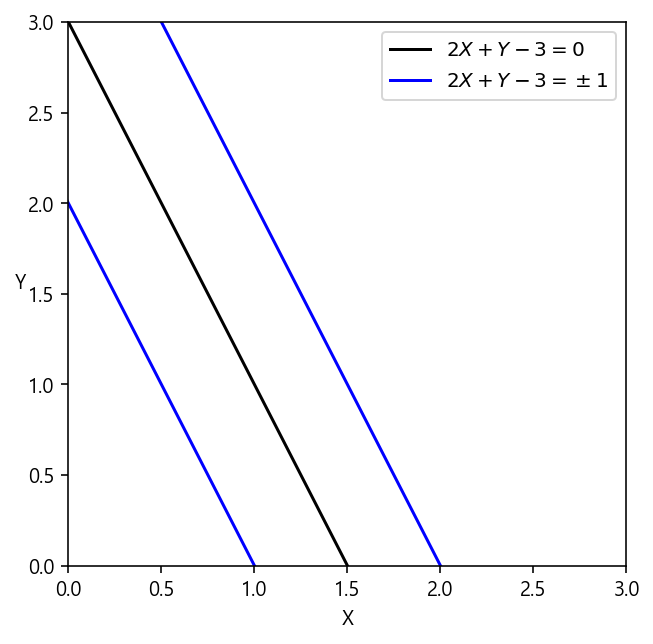

In [10]:
plt.figure(figsize=(5,5))
x = np.linspace(-1, 3, 200)
y = -2*x+3
yp1 = -2*x+4
ym1 = -2*x+2
plt.plot(x, y, 'k-', label='$2X+Y-3=0$')
plt.plot(x, yp1, 'b-', label='$2X+Y-3=\pm1$')
plt.plot(x, ym1, 'b-')
plt.axis([0, 3, 0, 3])
plt.xlabel('X')
plt.ylabel('Y', rotation=0)
plt.legend()
plt.show()

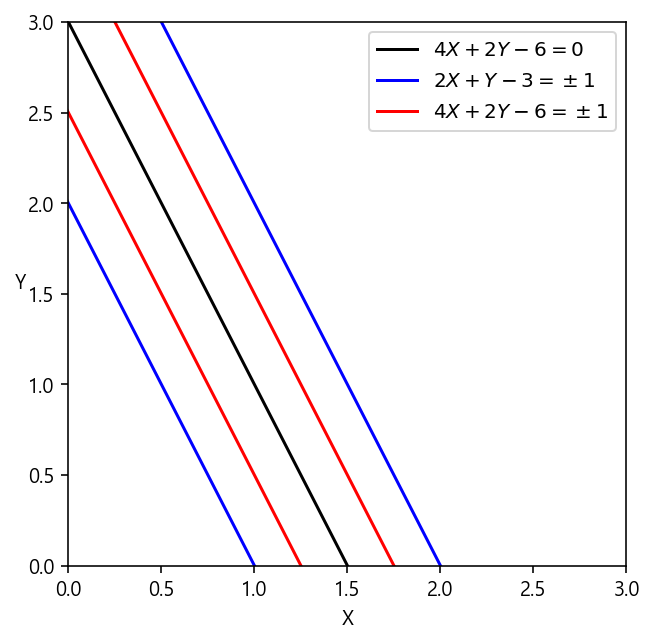

In [11]:
plt.figure(figsize=(5,5))
yp2 = -2*x+3.5
ym2 = -2*x+2.5
plt.plot(x, y, 'k-', label='$4X+2Y-6=0$')
plt.plot(x, yp1, 'b-', label='$2X+Y-3=\pm1$')
plt.plot(x, ym1, 'b-')
plt.plot(x, yp2, 'r-', label='$4X+2Y-6=\pm1$')
plt.plot(x, ym2, 'r-')
plt.axis([0, 3, 0, 3])
plt.xlabel('X')
plt.ylabel('Y', rotation=0)
plt.legend()
plt.show()

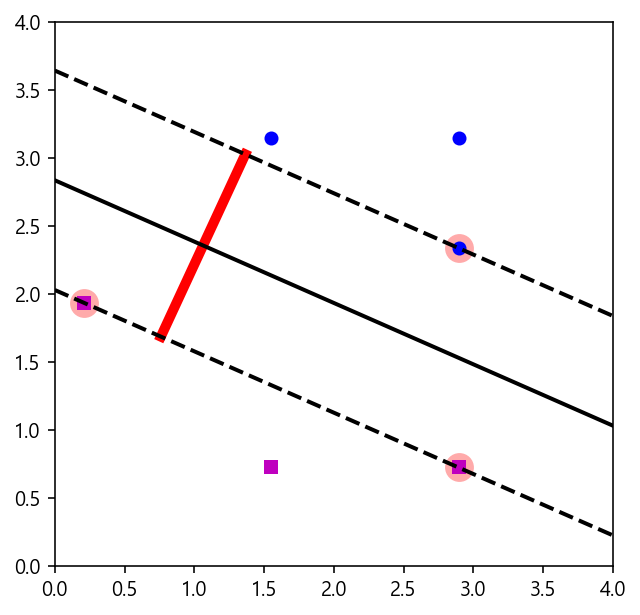

In [12]:
Xs = np.array([[1, 50], [5, 20], [3, 20], [3, 80], [5, 60], [5, 80]]).astype(np.float64)
ys = np.array([0, 0, 0, 1, 1, 1])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
X_new = X_scaled + 2

svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(X_new, ys)

plt.figure(figsize=(5,5))
plt.plot(X_new[:, 0][ys==1], X_new[:, 1][ys==1], "bo")
plt.plot(X_new[:, 0][ys==0], X_new[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 4, True)
plt.axis([0, 4, 0, 4])
plt.subplots_adjust(wspace=0.3)
plt.show()

붉은 선인 마진을 최대화해야합니다.

$
\begin{split}
&\underset{\mathbf{w}, b}{\operatorname{minimize}}\quad{\frac{1}{2}\mathbf{w}^T \mathbf{w}} \\
&\text{subject to} \quad t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1 \quad \text{for } i = 1, 2, \dots, m
\end{split}
$

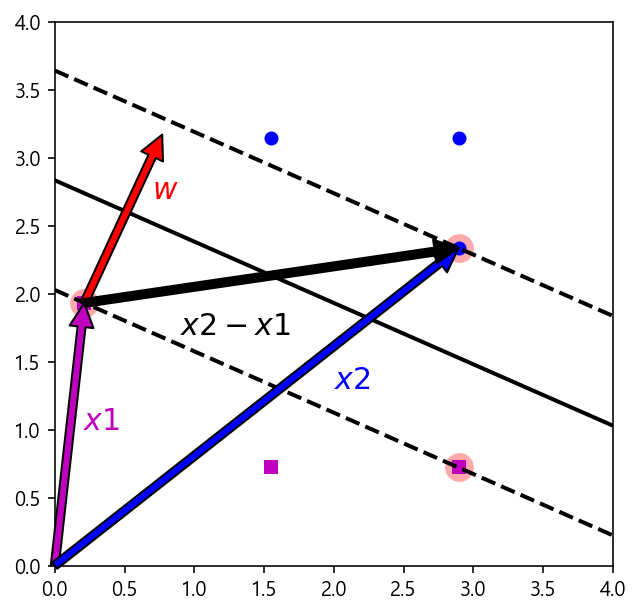

In [13]:
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
ws = w[0]**2 + w[1]**2

plt.figure(figsize=(5, 5))
plt.plot(X_new[:, 0][ys == 1], X_new[:, 1][ys == 1], "bo")
plt.plot(X_new[:, 0][ys == 0], X_new[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 4, False)
plt.axis([0, 4, 0, 4])
plt.subplots_adjust(wspace=0.3)
plt.annotate(
    "",
    xy=(X_new[0][0], X_new[0][1]),
    xytext=(0, 0),
    arrowprops=dict(facecolor='m', shrink=0),
)
plt.text(0.2, 1, '$x1$', fontsize=15, color='m')
plt.annotate(
    "",
    xy=(X_new[4][0], X_new[4][1]),
    xytext=(0, 0),
    arrowprops=dict(facecolor='b', shrink=0),
)
plt.text(2, 1.3, '$x2$', fontsize=15, color='b')
plt.annotate(
    "",
    xy=(X_new[0][0]+w[0], X_new[0][1]+w[1]),
    xytext=(X_new[0][0], X_new[0][1]),
    arrowprops=dict(facecolor='r', shrink=0),
)
plt.text(0.7, 2.7, '$w$', fontsize=15, color='r')
plt.annotate(
    "",
    xy=(X_new[4][0], X_new[4][1]),
    xytext=(X_new[0][0], X_new[0][1]),
    arrowprops=dict(facecolor='k', shrink=0),
)
plt.text(0.9, 1.7, '$x2-x1$', fontsize=15, color='k')
plt.show()

$
\begin{split}
&d={\begin{Vmatrix}(x_2-x_1)\end{Vmatrix}}\cos(\theta) \\
&d=\vec{(x_2-x_1)}\cdot \frac{\vec{w}}{\begin{Vmatrix}w\end{Vmatrix}}\ \ \ \because \vec{(x_2-x_1)}\cdot \vec{w} = {\begin{Vmatrix}(x_2-x_1)\end{Vmatrix}} {\begin{Vmatrix}w\end{Vmatrix}}\cos(\theta)\\
&=\frac{\vec{x_2}\cdot\vec{w}-\vec{x_1}\cdot\vec{w}}{\begin{Vmatrix}w\end{Vmatrix}} \\ 
&=\frac{(-b+1)-(b+1)}{\begin{Vmatrix}w\end{Vmatrix}}\ \ \ \because\vec{w}\cdot \vec{x_1}+b=-1 \ \ \ \& \ \ \ \vec{w}\cdot \vec{x_2}+b=1\\
&=\frac{2}{\begin{Vmatrix}w\end{Vmatrix}}
\end{split}
$

## 특성(feature)의 스케일링에 따른 SVM

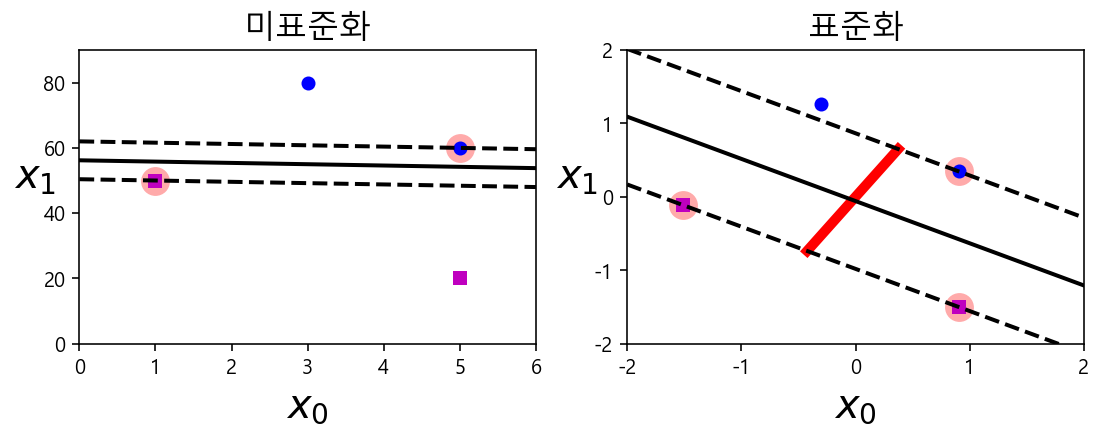

In [14]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$", fontsize=20, rotation=0)
plt.title("미표준화", fontsize=16)
plt.axis([0, 6, 0, 90])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("표준화", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.show()

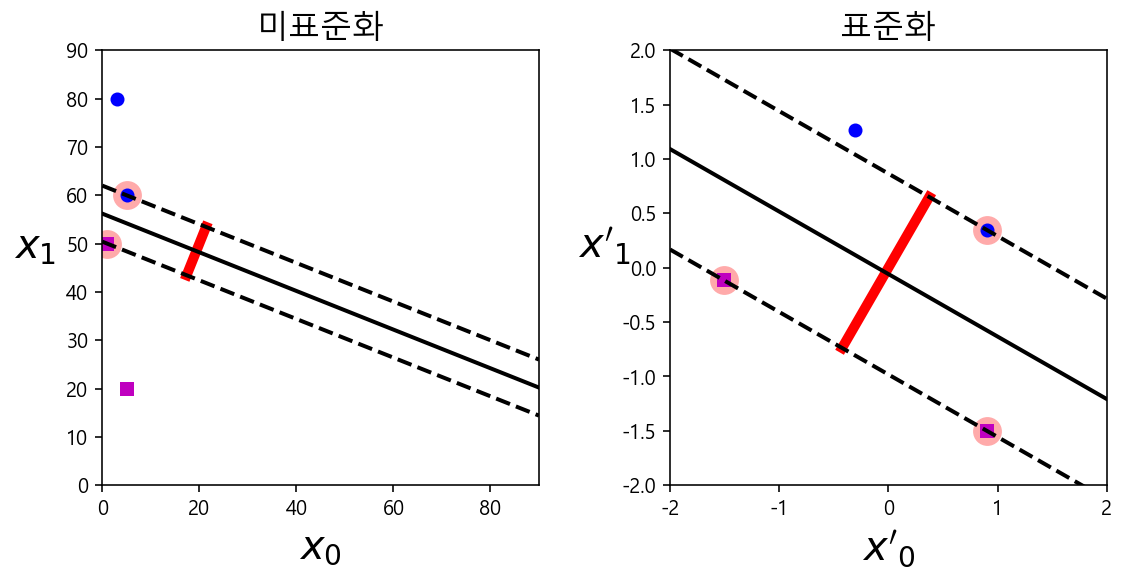

In [15]:
#  그래프의 범위가 동일하도록 조정합니다.
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 90)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("미표준화", fontsize=16)
plt.axis([0, 90, 0, 90])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("표준화", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.subplots_adjust(wspace=0.3)
plt.show()

## 소프트 마진 분류

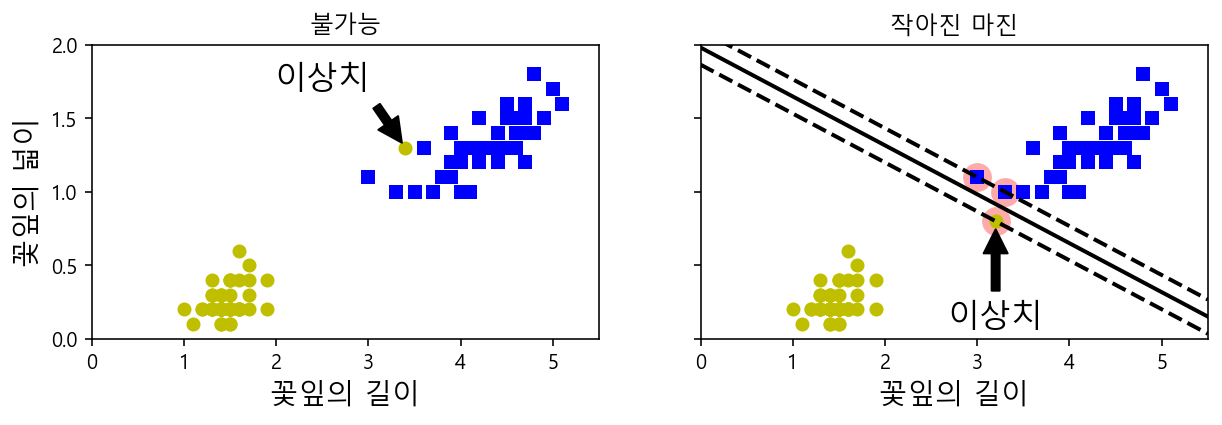

In [16]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)  # 데이터셋에 이상치 데이터를 추가합니다.
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.title('불가능')
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.xlabel("꽃잎의 길이", fontsize=14)
plt.ylabel("꽃잎의 넓이", fontsize=14)
plt.annotate("이상치",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.title('작아진 마진')
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5, False)
plt.xlabel("꽃잎의 길이", fontsize=14)
plt.annotate("이상치",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])
plt.show()

+ 하드 마진 분류란 모든 데이터를 분류하는 것.
+ 위처럼 이상치로 인해 데이터를 분리하지 못하거나 마진이 크게 줄어드는 문제등을 해결하기 위해 등장.

50.0
16.666666666666668
5.555555555555555
1.8518518518518519
0.6172839506172839


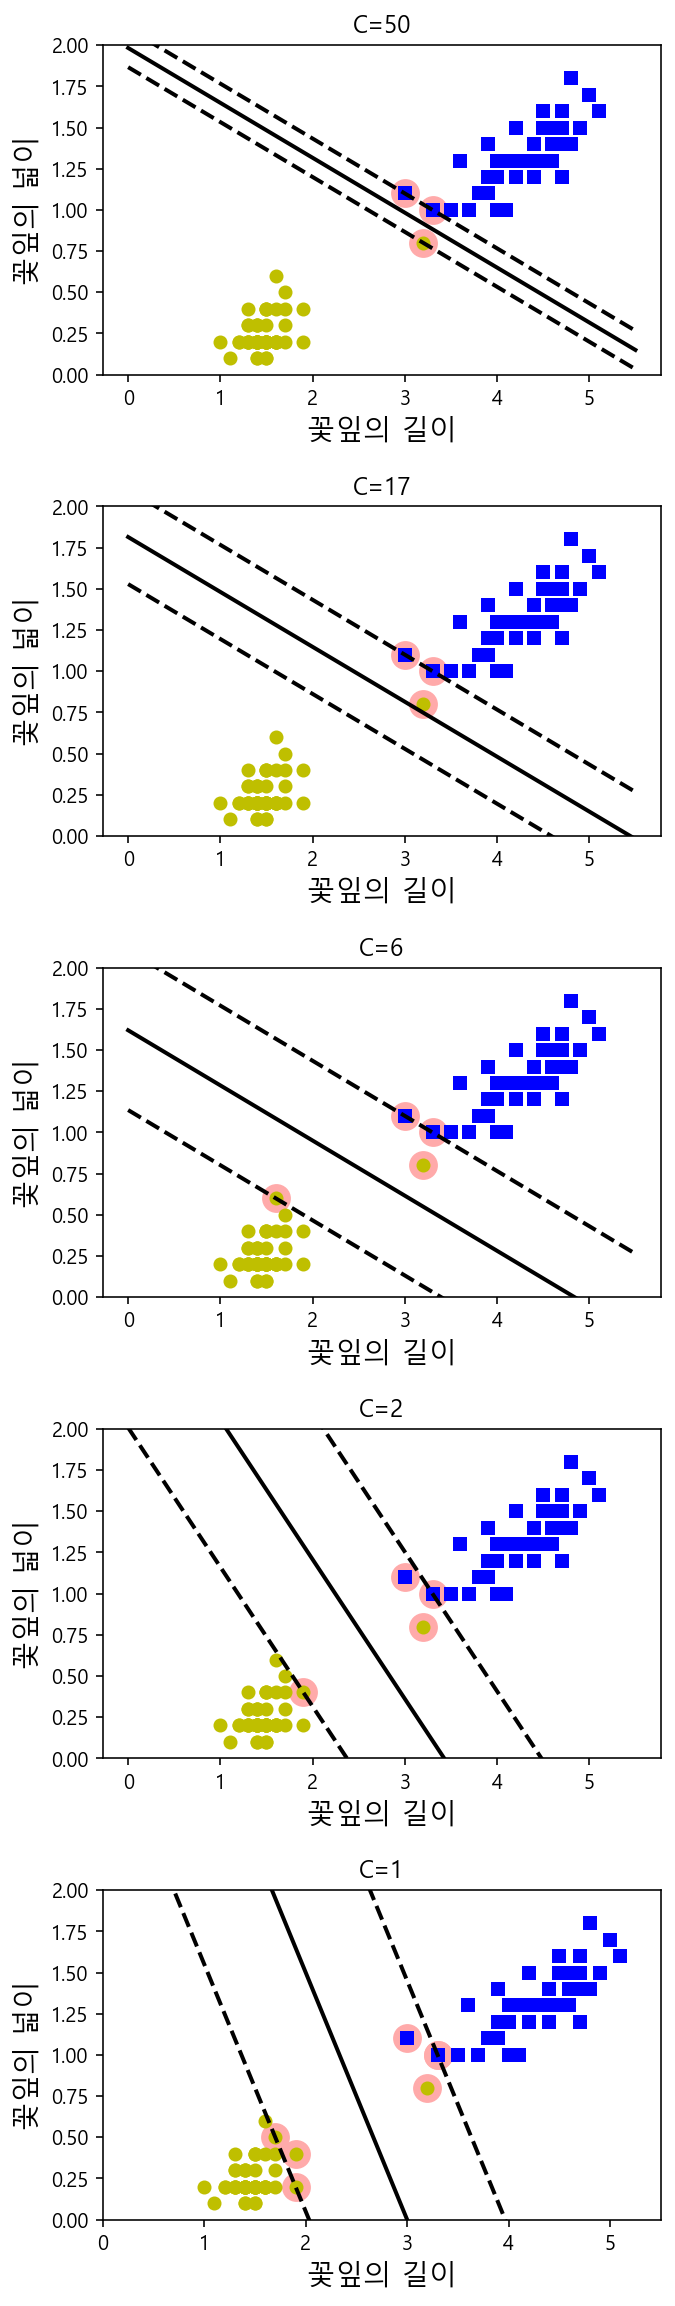

In [20]:
fig, axes = plt.subplots(nrows=5, figsize=(5,20), sharey=True)

for i in range(5):
    c = (50)/(3**i)
    print(c)
    svm_clf2 = SVC(kernel="linear", C=c)
    svm_clf2.fit(Xo2, yo2)
    
    plt.sca(axes[i])
    plt.title(f'C={round(c)}')
    plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
    plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
    plot_svc_decision_boundary(svm_clf2, 0, 5.5, False)
    plt.xlabel("꽃잎의 길이", fontsize=14)
    plt.ylabel("꽃잎의 넓이", fontsize=14)
plt.subplots_adjust(hspace=0.4)
plt.axis([0, 5.5, 0, 2])
plt.show()

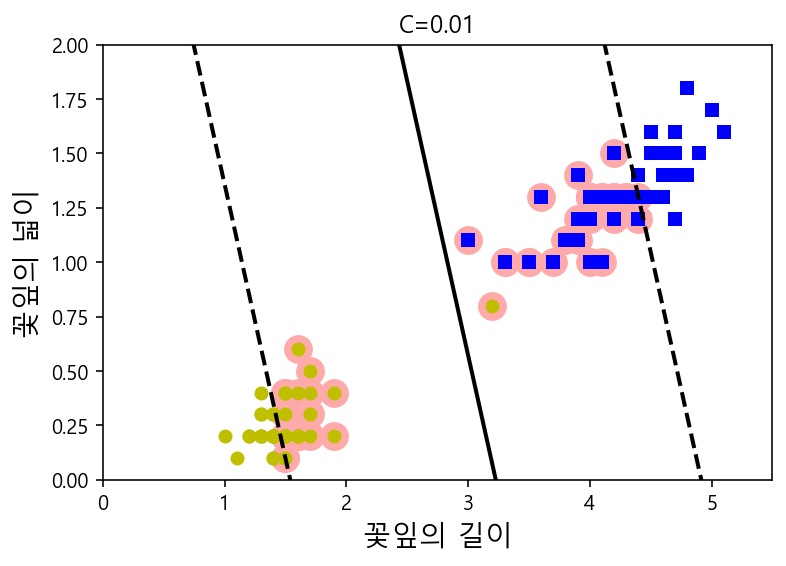

In [25]:
c=0.01
svm_clf2 = SVC(kernel="linear", C=c)
svm_clf2.fit(Xo2, yo2)

plt.title(f'C={c}')
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5, False)
plt.xlabel("꽃잎의 길이", fontsize=14)
plt.ylabel("꽃잎의 넓이", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

$
\begin{split}
&\text{subject to} \quad t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1 - \zeta^{(i)} \quad \text{and} \quad \zeta^{(i)} \ge 0 \quad \text{for } i = 1, 2, \dots, m \\
& \mathbf{w}^T \mathbf{x}^{(i)} + b \leq -1 + \zeta^{(i)} \quad \\
& \mathbf{w}^T \mathbf{x}^{(i)} + b \geq 1 - \zeta^{(i)} \quad \\
&\text{따라서 마진 안쪽의 노란 점에 대해 거리 d는} \\
&w^{T}x+b-1 \leq \zeta^{(i)} \\
&\therefore d=\frac{\zeta^{(i)}}{\begin{Vmatrix}w\end{Vmatrix}}
\end{split}
$

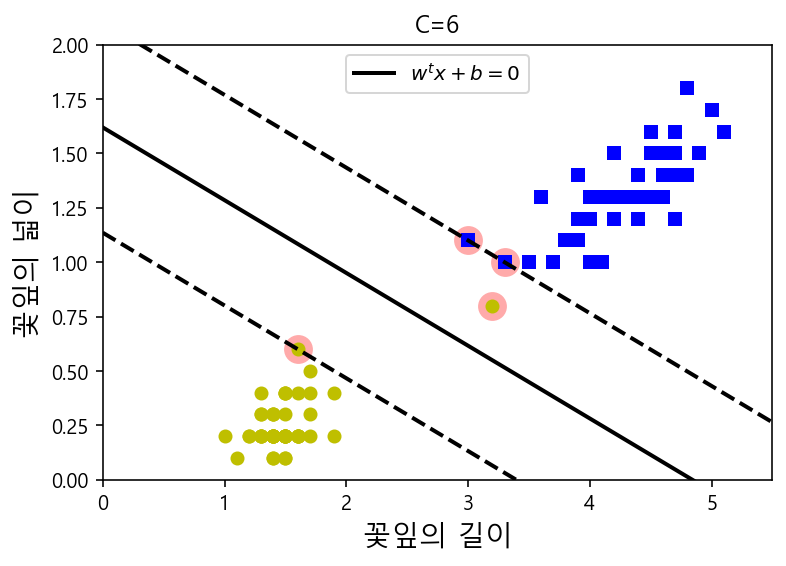

In [18]:
svm_clf2 = SVC(kernel="linear", C=6)
svm_clf2.fit(Xo2, yo2)

plt.title(f'C=6')
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")

w = svm_clf2.coef_[0]  # 법선벡터
b = svm_clf2.intercept_[0]  # 상수
v = w[0]**2 + w[1]**2  # 벡터의 크기
# 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
# => x1 = -w0/w1 * x0 - b/w1
x0 = np.linspace(0, 5.5, 200)  # 선을 긋기 위해 200개의 점을 생성합니다.
decision_boundary = -w[0] / w[1] * x0 - b / w[1]  # 결정경계

gutter_up = decision_boundary + 1 / w[1]
gutter_down = decision_boundary - 1 / w[1]

s1, s2 = svm_clf2.support_vectors_[:, 0], svm_clf2.support_vectors_[:, 1]
plt.scatter(s1, s2, s=180, facecolors='#FFAAAA')  # 서포트 벡터를 분홍색으로 표시합니다.

plt.plot(x0, decision_boundary, "k-", linewidth=2, label='$w^{t}x+b=0$')
plt.plot(x0, gutter_up, "k--", linewidth=2)
plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.xlabel("꽃잎의 길이", fontsize=14)
plt.ylabel("꽃잎의 넓이", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.legend()
plt.show()

# 비선형 SVM

+ 선형으로 구분 불가능한 데이터셋에 특성을 추가하여 선형분리가 가능하도록 하는 예시입니다.

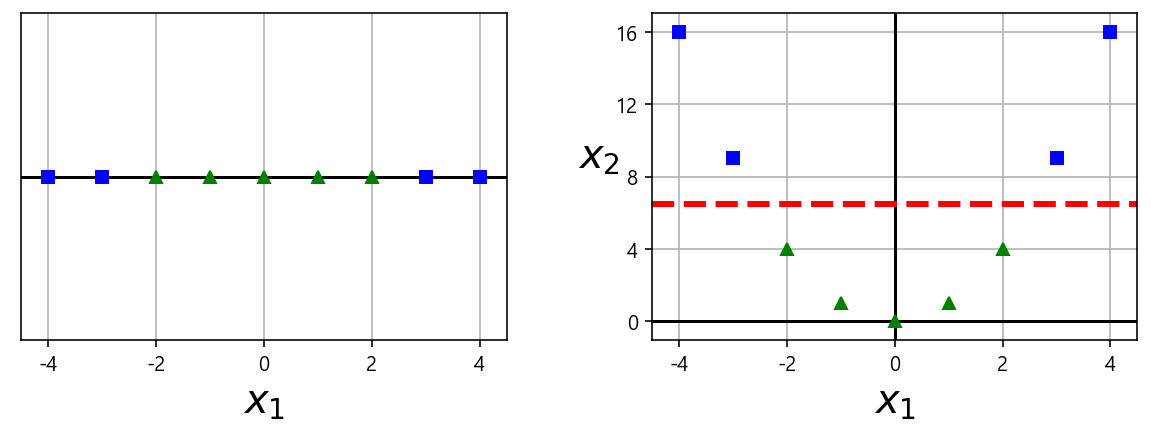

In [19]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(wspace=0.3)
plt.show()

In [20]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

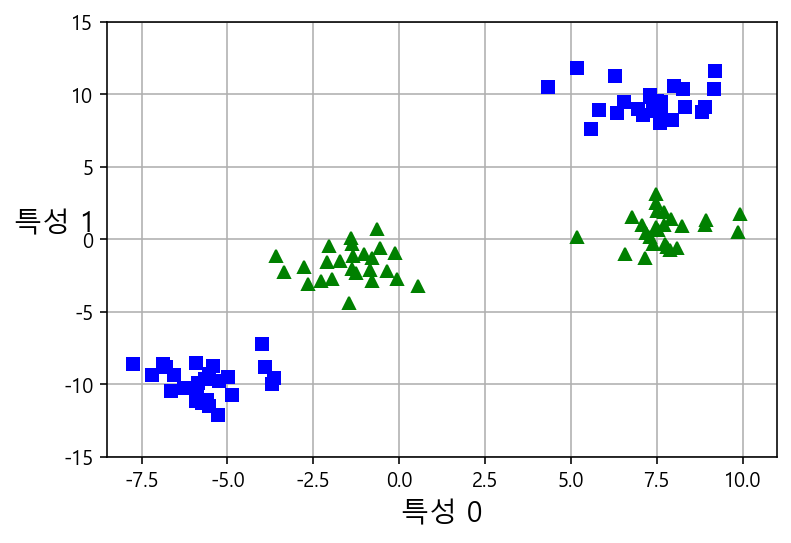

In [21]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

plot_dataset(X, y, [-8.5, 11, -15, 15])
plt.xlabel("특성 0", fontsize=14)
plt.ylabel("특성 1", fontsize=14)
plt.show() # 책에는 없음

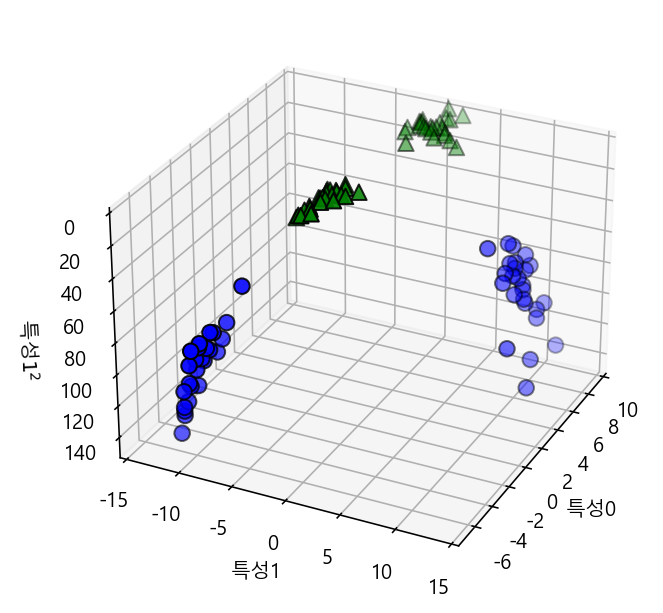

In [22]:
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
figure.add_axes(ax)

# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='g', marker='^',
           s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성$1^2$")
ax.set_xlim3d(-7.5, 10)
ax.set_ylim3d(-15, 15)
ax.set_zlim3d(0, 150)
plt.show()

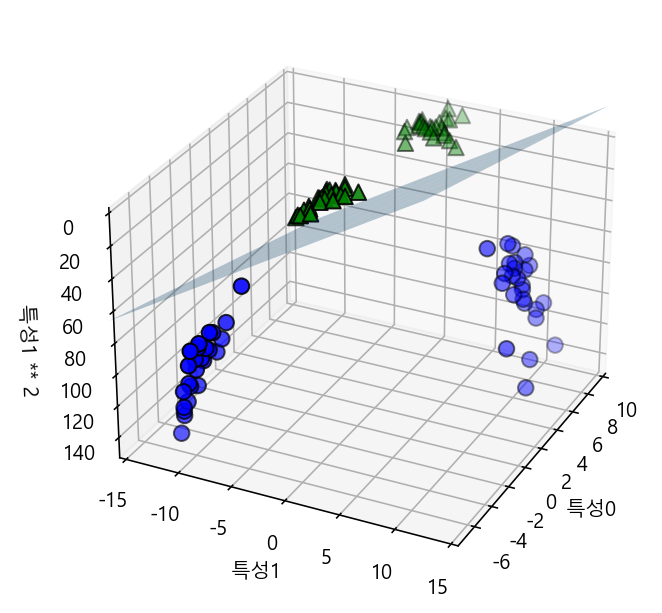

In [23]:
from sklearn.svm import LinearSVC
linear_svm_3d = LinearSVC(C=10**9, loss='hinge', max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
figure.add_axes(ax)

xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='g', marker='^',
           s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")
ax.set_xlim3d(-7.5, 10)
ax.set_ylim3d(-15, 15)
ax.set_zlim3d(0, 150)
plt.show()

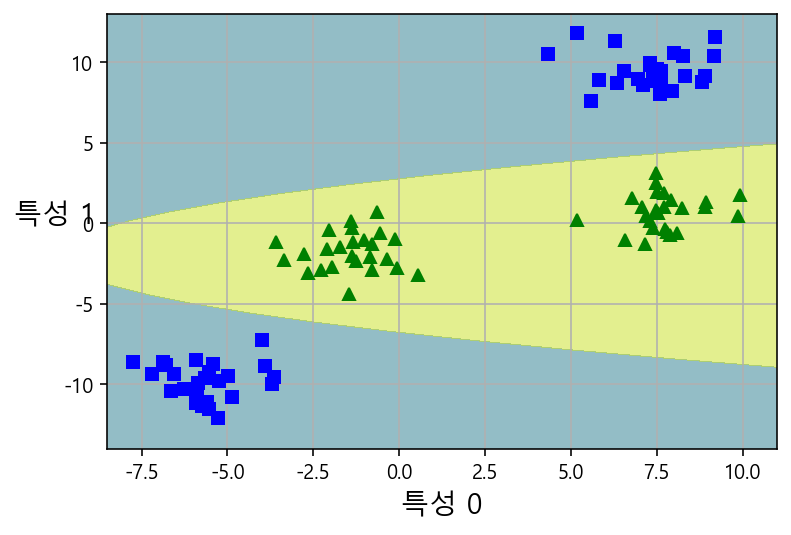

In [24]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             alpha=0.5)
plot_dataset(X, y, [-8.5, 11, -15, 15])
plt.xlabel("특성 0", fontsize=14)
plt.ylabel("특성 1", fontsize=14)
plt.axis([-8.5, 11, -14, 13])
plt.show()

## 다항식 커널

$
\quad K(\mathbf{a}, \mathbf{b}) = \left(\gamma \mathbf{a}^T \mathbf{b} + r \right)^d \\
$

+ 선형 분리가 불가능한 make_moons 데이터셋을 불러옵니다.

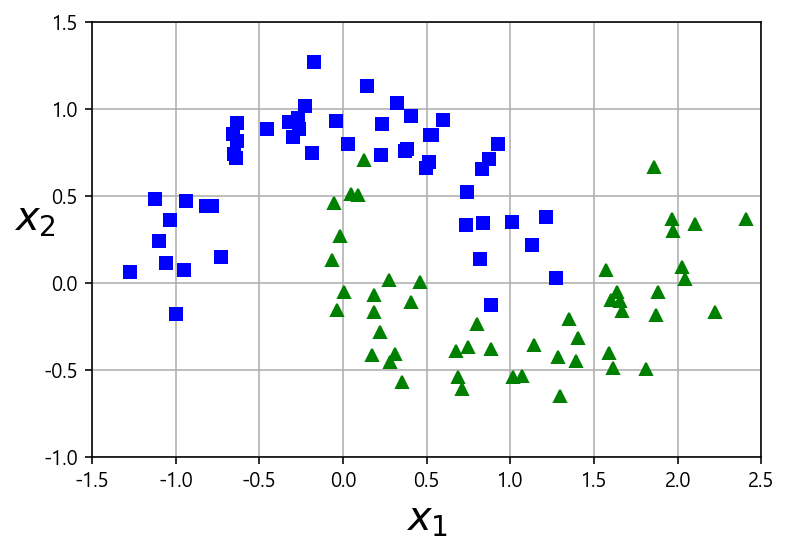

In [25]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [26]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

C:\Users\Tripleler\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

In [27]:
a = np.array([[1, 3]])
a

array([[1, 3]])

In [28]:
poly = PolynomialFeatures(degree=3)
poly.fit_transform(a)

array([[ 1.,  1.,  3.,  1.,  3.,  9.,  1.,  3.,  9., 27.]])

$a^0\cdot b^0,\ \ a^1\cdot b^0,\ \ a^0\cdot b^1,\ \ a^2\cdot b^0,\ \ a^1\cdot b^1,\ \ a^0\cdot b^2,\ \ 
a^3\cdot b^0,\ \ a^2\cdot b^1,\ \ a^1\cdot b^2,\ \ a^0\cdot b^3$

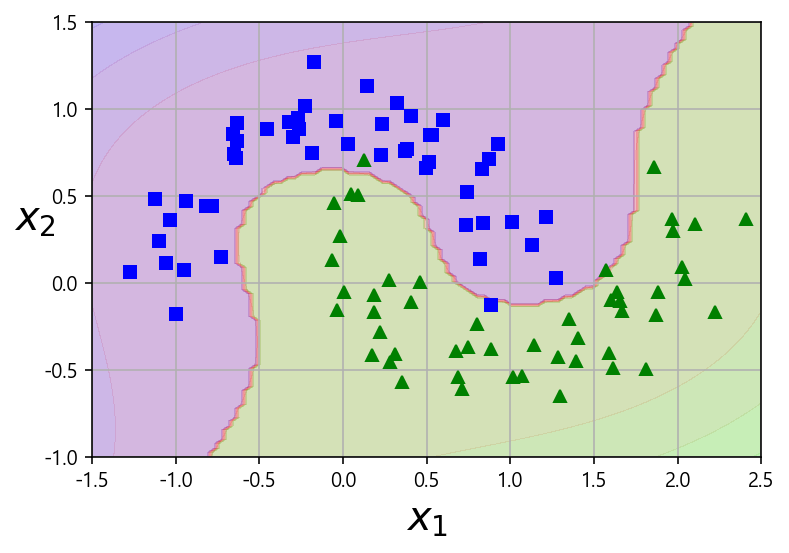

In [29]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [30]:
poly_kernel_svm_clf1 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf1.fit(X, y)

poly_kernel_svm_clf2 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5))
    ])
poly_kernel_svm_clf2.fit(X, y)

poly_kernel_svm_clf3 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly_kernel_svm_clf3.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

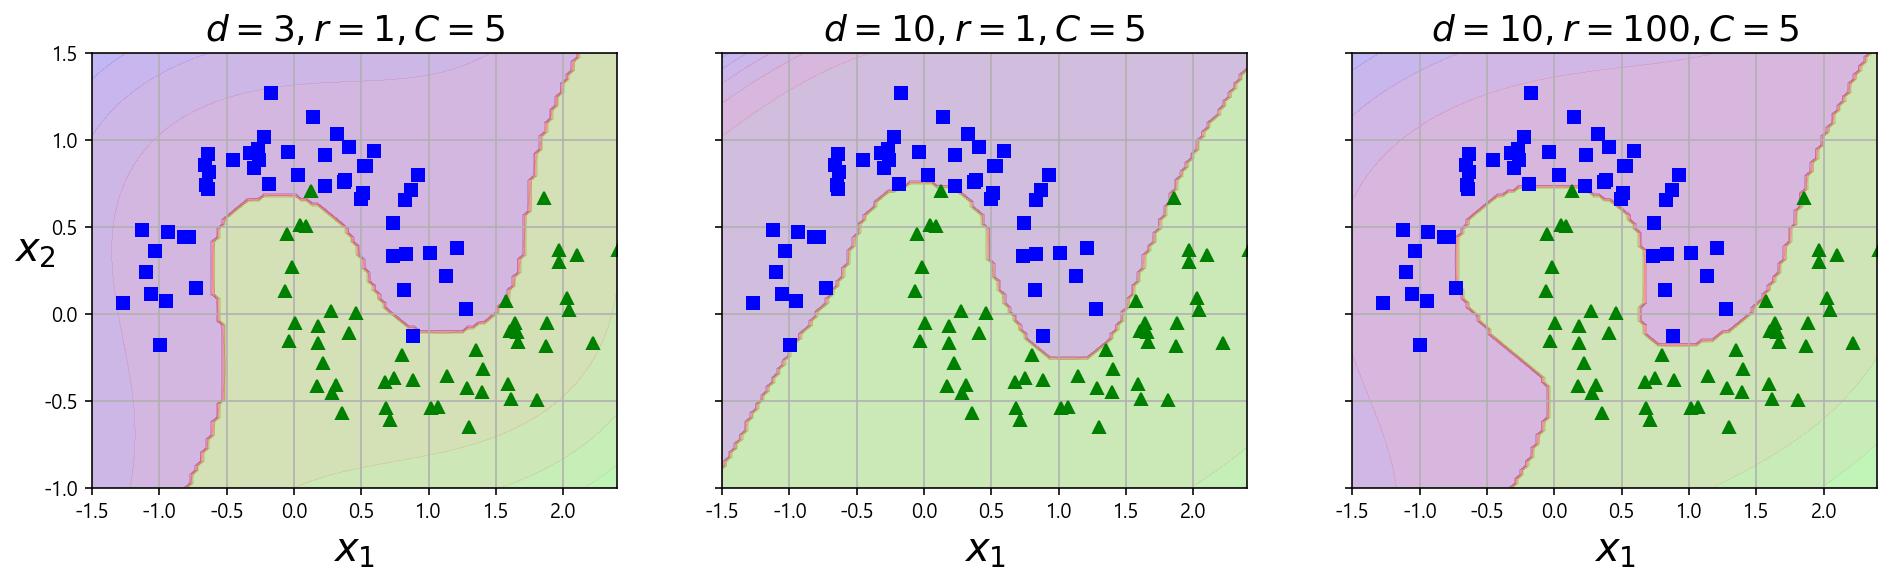

In [31]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf1, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly_kernel_svm_clf2, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=1, C=5$", fontsize=18)
plt.ylabel("")

plt.sca(axes[2])
plot_predictions(poly_kernel_svm_clf3, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

## 가우시안 RBF 커널

$
{\displaystyle N(u, \sigma)} = {\displaystyle \frac{1}{\sqrt{2\pi}\sigma}\exp({\displaystyle -\frac{(x-u)^2}{2\sigma^2}})}
$

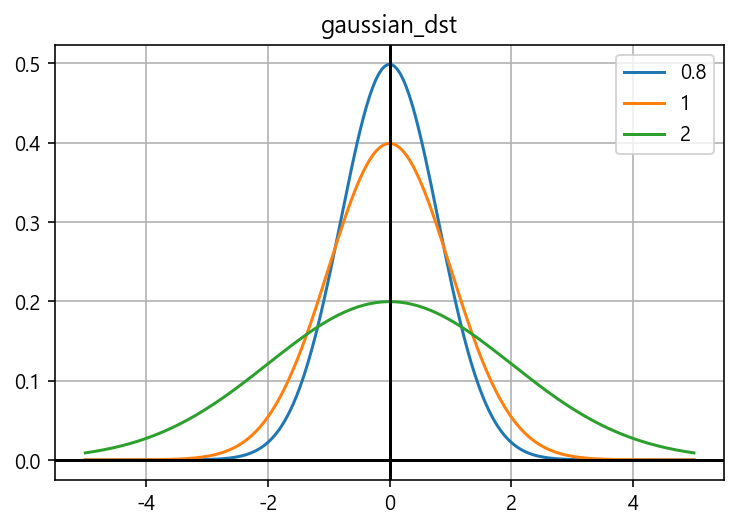

In [32]:
from scipy.stats import norm
a = np.linspace(-5, 5, 200)
b1 = norm(0, 1).pdf(a)
b2 = norm(0, 2).pdf(a)
b3 = norm(0, 0.8).pdf(a)
plt.plot(a, b3, label='0.8')
plt.plot(a, b1, label='1')
plt.plot(a, b2, label='2')
plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.grid()
plt.legend()
plt.title('gaussian_dst')
plt.show()

$
{\displaystyle \phi_{\gamma}(\mathbf{x}, \boldsymbol{\ell})} = {\displaystyle \exp({\displaystyle -\gamma \left\| \mathbf{x} - \boldsymbol{\ell} \right\|^2})}
$

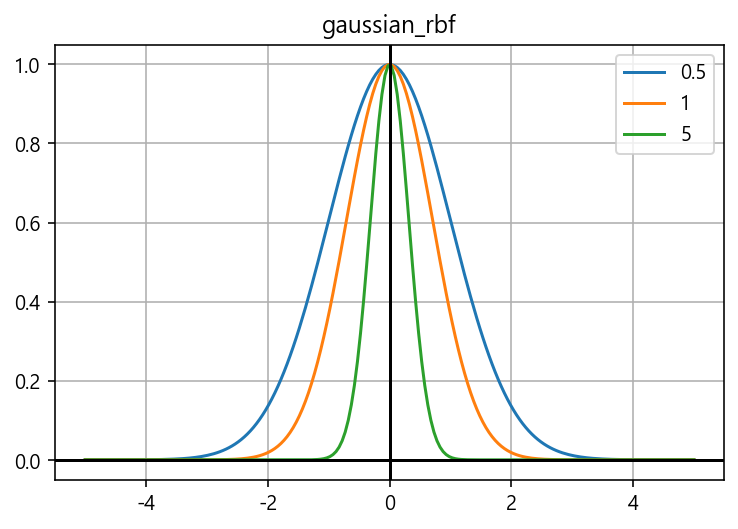

In [33]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

a = np.linspace(-5, 5, 200).reshape(-1, 1)
b1 = gaussian_rbf(a, 0, 0.5)
b2 = gaussian_rbf(a, 0, 1)
b3 = gaussian_rbf(a, 0, 5)
plt.plot(a, b1, label='0.5')
plt.plot(a, b2, label='1')
plt.plot(a, b3, label='5')
plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.grid()
plt.legend()
plt.title('gaussian_rbf')
plt.show()

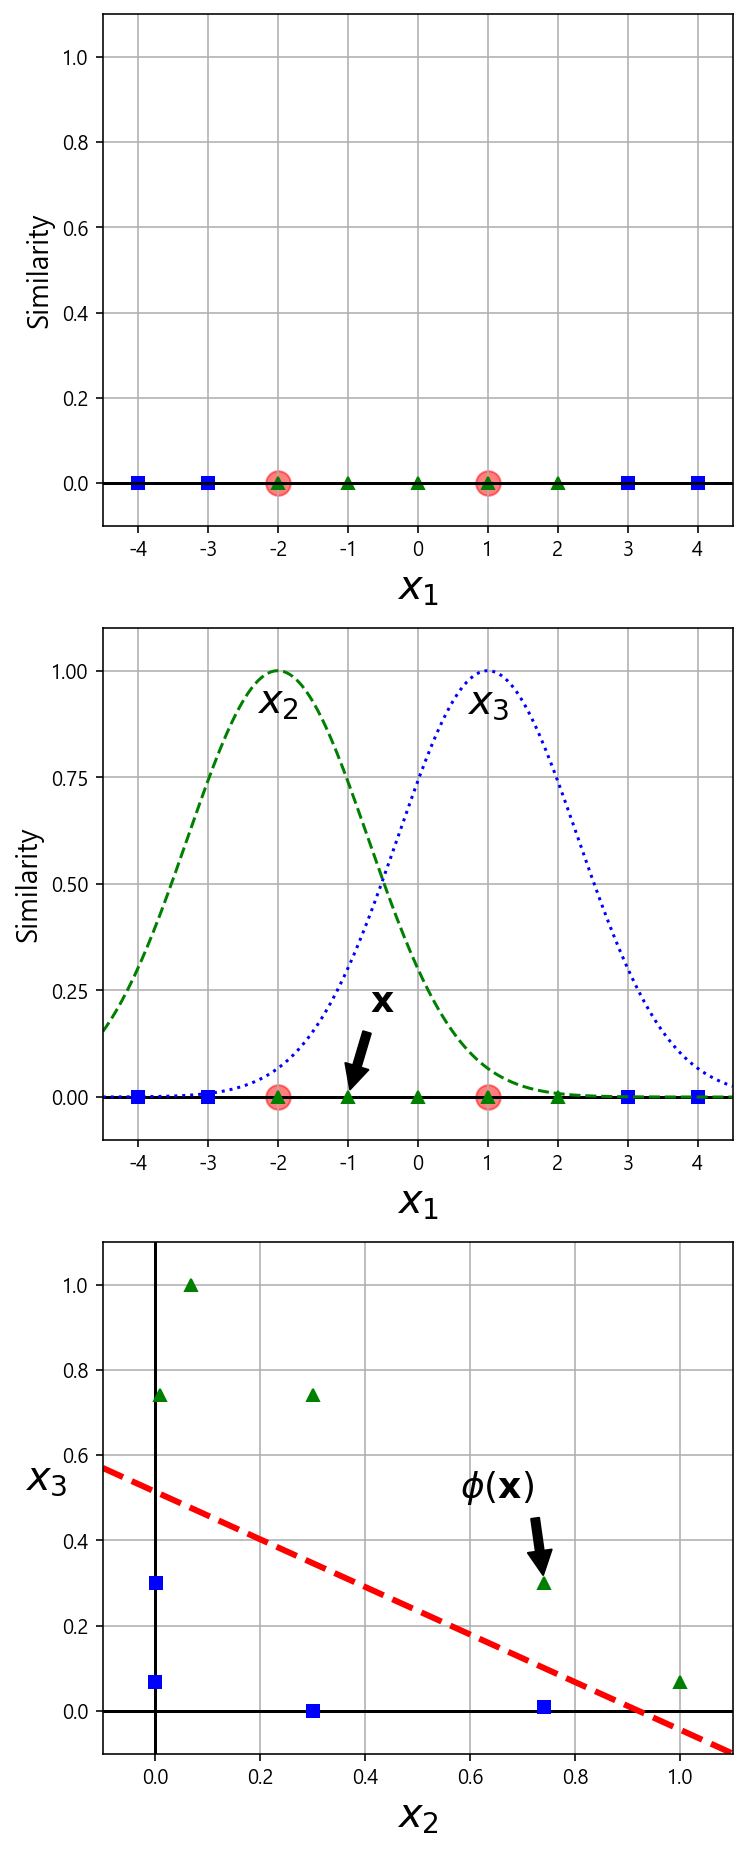

In [34]:
gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(5, 16))

plt.subplot(311)
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.axis([-4.5, 4.5, -0.1, 1.1])
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")

plt.subplot(312)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(313)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)
plt.show()

In [35]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

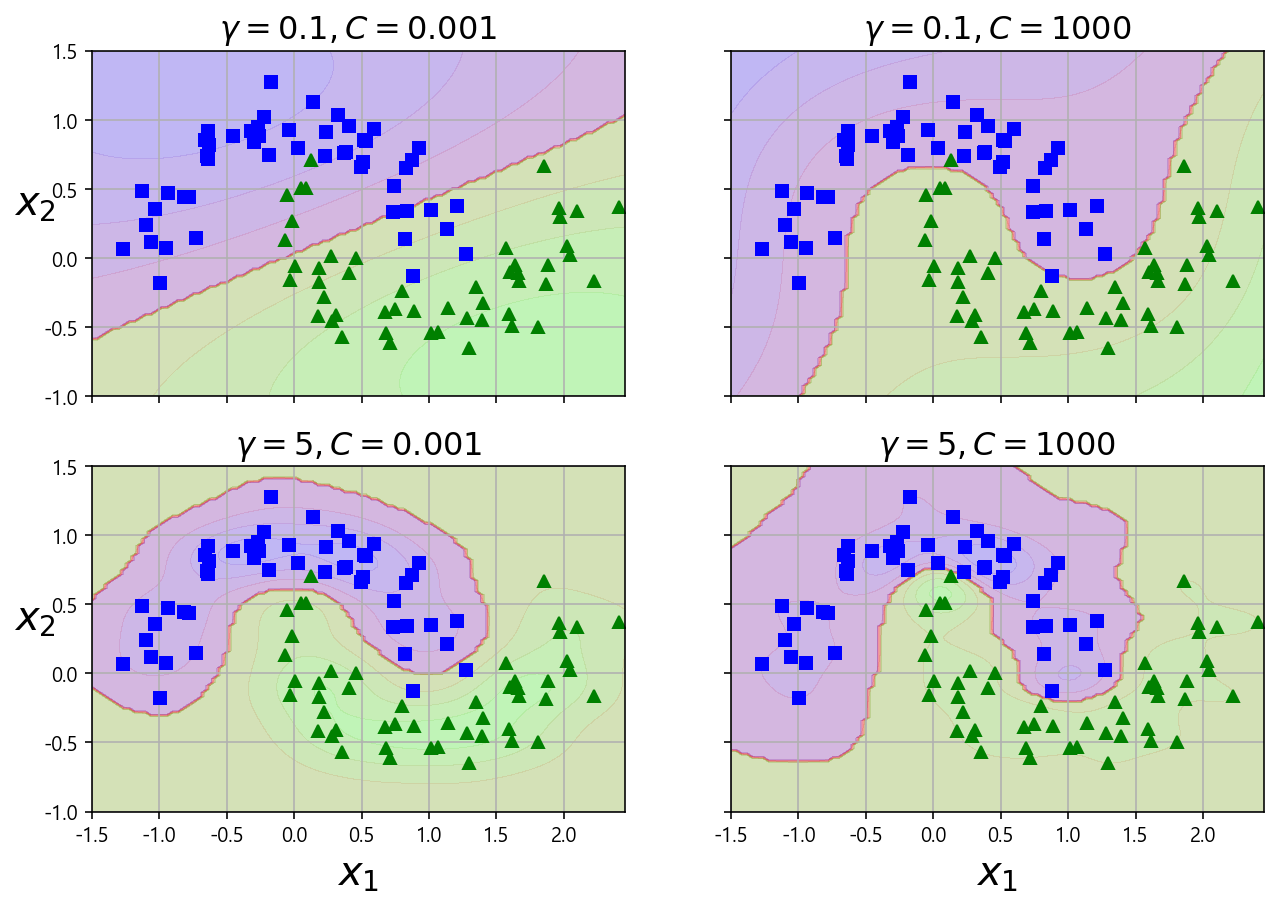

In [36]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

# SVM 회귀

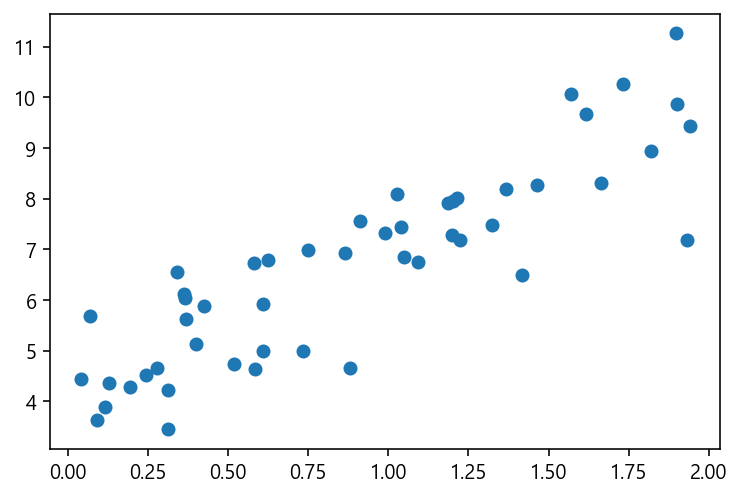

In [37]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()
plt.scatter(X, y)
plt.show()

In [38]:
from sklearn.svm import LinearSVR

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

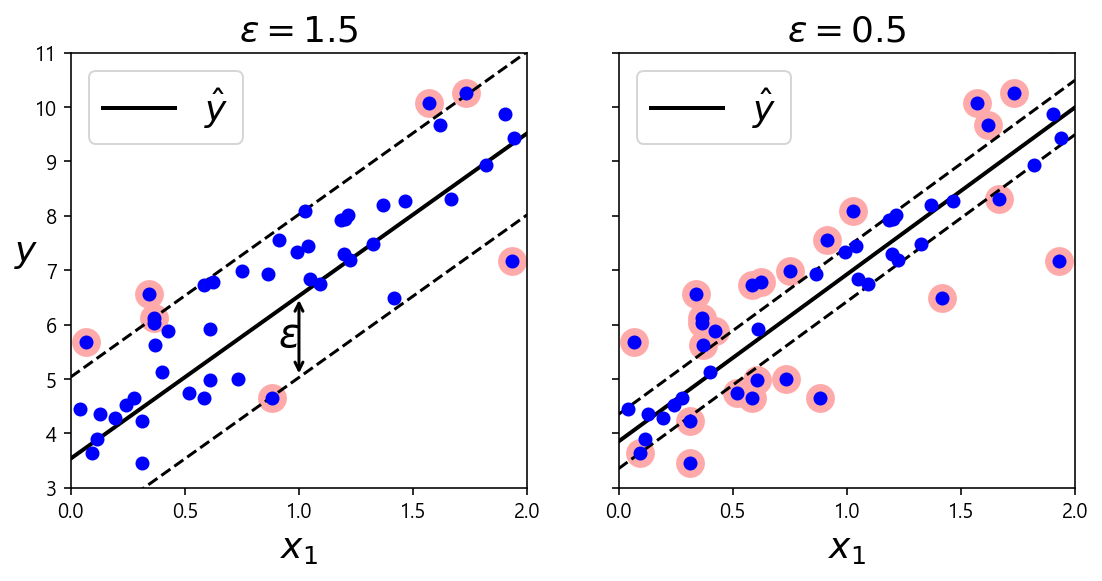

In [39]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

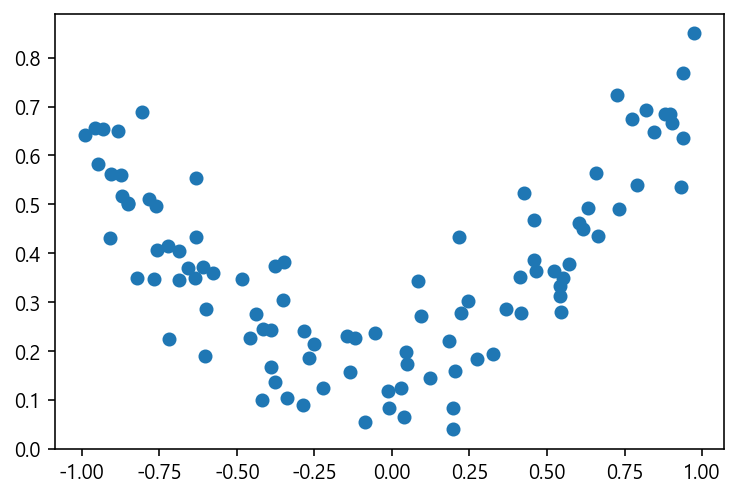

In [40]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()
plt.scatter(X, y)
plt.show()

In [41]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

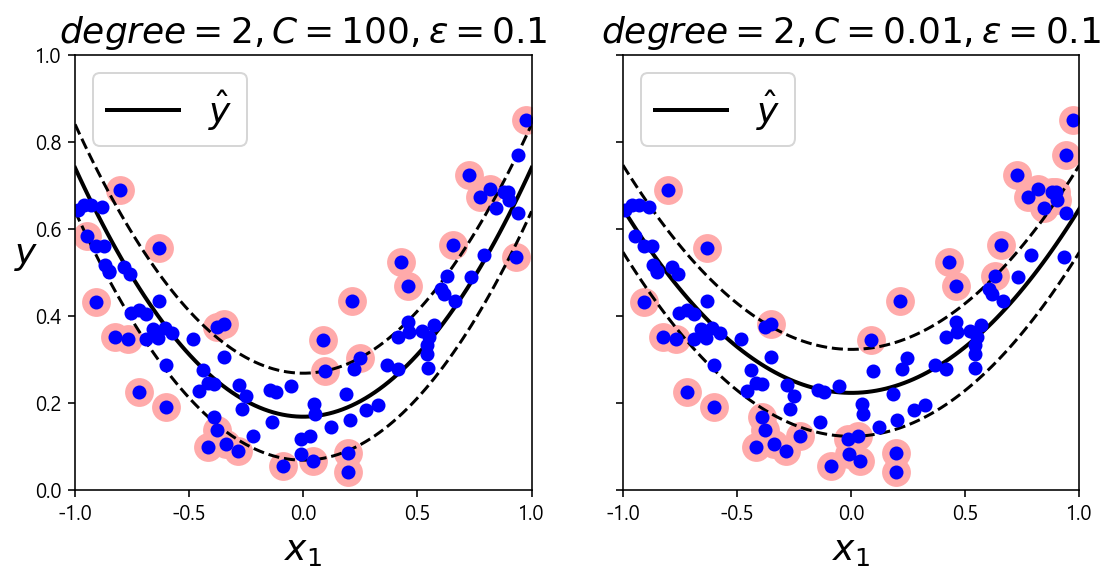

In [42]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()